In [63]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import argparse

In [64]:
# Realpath to sqlite3 db
DATABASE_PATH = os.path.abspath("/oscar/data/shared/eval_gracehopper/results/performance.sqlite3")

In [65]:
# Configure parser
parser = argparse.ArgumentParser(
    prog='PlotMetrics',
    description='Plots the MLPerf metrics from sqlite3 database'
)
parser.add_argument('--model', help='Model for which to plot metrics')

# Get the command-line arguments
args = parser.parse_args('')

In [66]:
# Establish a connection to the sqlite3 db + read the db into a pandas dataframe
with sqlite3.connect(DATABASE_PATH) as dbcon:
    df = pd.read_sql_query("SELECT * FROM perfmetrics", dbcon)
print(df.head(10))

   RUN_ID         BENCH_MARK               ARCH    MODEL  BACKEND  \
0       1  inference-bert-99  arm64-gracehopper  bert-99  PyTorch   
1       1  inference-bert-99  arm64-gracehopper  bert-99  PyTorch   
2       1  inference-bert-99  arm64-gracehopper  bert-99  PyTorch   
3       1  inference-bert-99  arm64-gracehopper  bert-99  PyTorch   
4       2  inference-bert-99        x86_64-h100  bert-99  PyTorch   
5       2  inference-bert-99        x86_64-h100  bert-99  PyTorch   
6       2  inference-bert-99        x86_64-h100  bert-99  PyTorch   
7       2  inference-bert-99        x86_64-h100  bert-99  PyTorch   
8       3  inference-bert-99        x86_64-a100  bert-99  PyTorch   
9       3  inference-bert-99        x86_64-a100  bert-99  PyTorch   

               METRIC         VALUE  
0  SAMPLES_PER_SECOND  1.311110e+01  
1      MIN_LATENCY_NS  6.136348e+08  
2      MAX_LATENCY_NS  7.627102e+08  
3     MEAN_LATENCY_NS  6.885984e+08  
4  SAMPLES_PER_SECOND  5.288370e+00  
5      MIN_L

In [67]:
# Convert metrics into columns for each run ID
run_metrics = df[['RUN_ID', 'METRIC', 'VALUE']].pivot(index='RUN_ID', columns='METRIC', values='VALUE')
run_metrics.columns

Index(['MAX_LATENCY_NS', 'MEAN_LATENCY_NS', 'MIN_LATENCY_NS',
       'SAMPLES_PER_SECOND'],
      dtype='object', name='METRIC')

In [68]:
run_metrics.head(10)

METRIC,MAX_LATENCY_NS,MEAN_LATENCY_NS,MIN_LATENCY_NS,SAMPLES_PER_SECOND
RUN_ID,,,,
1,7.627102e+08,6.885984e+08,6.136348e+08,13.11110
2,1.890941e+09,1.844929e+09,1.797373e+09,5.28837
3,1.466887e+09,1.399417e+09,1.331371e+09,6.81716
4,2.808634e+08,2.808634e+08,2.808634e+08,35.60450
5,3.882365e+08,3.882365e+08,3.882365e+08,25.75750
6,4.405160e+08,4.405160e+08,4.405160e+08,22.70070
7,1.177718e+09,1.177718e+09,1.177718e+09,8.49099
8,1.223812e+09,1.223812e+09,1.223812e+09,8.17119
9,1.223812e+09,1.223812e+09,1.223812e+09,8.17119


In [69]:
# Group by run ID
unique_runs_gb = df[['BENCH_MARK', 'ARCH', 'MODEL', 'BACKEND']].groupby(df['RUN_ID'])
unique_runs = unique_runs_gb.aggregate({'BENCH_MARK': 'first', 'ARCH': 'first', 'MODEL': 'first', 'BACKEND': 'first'})
unique_runs

,BENCH_MARK,ARCH,MODEL,BACKEND
RUN_ID,,,,
1,inference-bert-99,arm64-gracehopper,bert-99,PyTorch
2,inference-bert-99,x86_64-h100,bert-99,PyTorch
3,inference-bert-99,x86_64-a100,bert-99,PyTorch
4,inference-resnet-50,x86_64-a100,resnet-50,tensorflow
5,inference-resnet-50,arm64-gracehopper,resnet-50,tensorflow
6,inference-resnet-50,x86_64-h100,resnet-50,tensorflow
7,MLPerf-Inference,gracehopper-arm64,resnet-50,tf
8,MLPerf-Inference,gracehopper-arm64,resnet-50,tf
9,MLPerf-Inference,gracehopper-arm64,resnet-50,tf


In [70]:
# Achieved desired table form to plot on X-Y plane
plot_df = unique_runs.join(run_metrics, on='RUN_ID')
print(type(plot_df))
plot_df

<class 'pandas.core.frame.DataFrame'>


,BENCH_MARK,ARCH,MODEL,BACKEND,MAX_LATENCY_NS,MEAN_LATENCY_NS,MIN_LATENCY_NS,SAMPLES_PER_SECOND
RUN_ID,,,,,,,,
1,inference-bert-99,arm64-gracehopper,bert-99,PyTorch,7.627102e+08,6.885984e+08,6.136348e+08,13.11110
2,inference-bert-99,x86_64-h100,bert-99,PyTorch,1.890941e+09,1.844929e+09,1.797373e+09,5.28837
3,inference-bert-99,x86_64-a100,bert-99,PyTorch,1.466887e+09,1.399417e+09,1.331371e+09,6.81716
4,inference-resnet-50,x86_64-a100,resnet-50,tensorflow,2.808634e+08,2.808634e+08,2.808634e+08,35.60450
5,inference-resnet-50,arm64-gracehopper,resnet-50,tensorflow,3.882365e+08,3.882365e+08,3.882365e+08,25.75750
6,inference-resnet-50,x86_64-h100,resnet-50,tensorflow,4.405160e+08,4.405160e+08,4.405160e+08,22.70070
7,MLPerf-Inference,gracehopper-arm64,resnet-50,tf,1.177718e+09,1.177718e+09,1.177718e+09,8.49099
8,MLPerf-Inference,gracehopper-arm64,resnet-50,tf,1.223812e+09,1.223812e+09,1.223812e+09,8.17119
9,MLPerf-Inference,gracehopper-arm64,resnet-50,tf,1.223812e+09,1.223812e+09,1.223812e+09,8.17119


<Axes: xlabel='MODEL'>

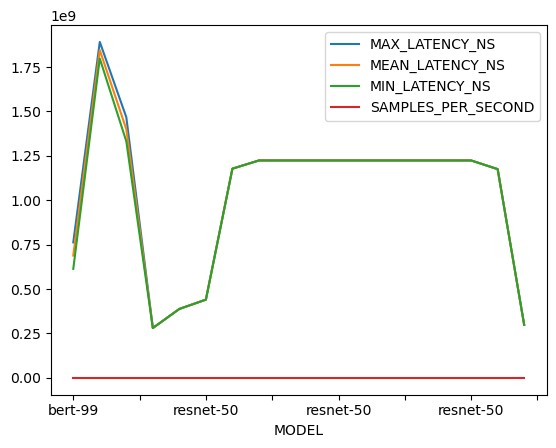

In [71]:
plot_df.plot(x='MODEL', y=['MAX_LATENCY_NS', 'MEAN_LATENCY_NS', 'MIN_LATENCY_NS', 'SAMPLES_PER_SECOND'])

As you can see, this plot isn't very helpful. Thus, I decided to create subplots for each individual metrics, comparing the metric across architectures and models.

In [72]:
def subplot_model_metrics(df: pd.DataFrame, x: str, args):
    """
    Plots the metrics for the model specified by the '--model' argument.
    If this argument doesn't exist, then input df should already contain one model.
    """
    figure, axis = plt.subplots(2,2)
    if args.model:
        df = df[df['MODEL'].str.contains(args.model)]
    df.plot(x=x, y='MAX_LATENCY_NS', ax=axis[0,0], kind='bar')
    axis[0,0].set_title("Max Latency (S)")
    axis[0,0].tick_params(axis='x', labelrotation=0)

    df.plot(x=x, y='MEAN_LATENCY_NS', ax=axis[0,1], kind='bar')
    axis[0,1].set_title("Mean Latency (S)")
    axis[0,1].tick_params(axis='x', labelrotation=0)

    df.plot(x=x, y='MIN_LATENCY_NS', ax=axis[1,0], kind='bar')
    axis[1,0].set_title("Min Latency (S)")
    axis[1,0].tick_params(axis='x', labelrotation=0)

    df.plot(x=x, y='SAMPLES_PER_SECOND', ax=axis[1,1], kind='bar')
    axis[1,1].set_title("Samples Per Second")
    axis[1,1].tick_params(axis='x', labelrotation=0)
    figure.subplots_adjust(hspace=0.5)

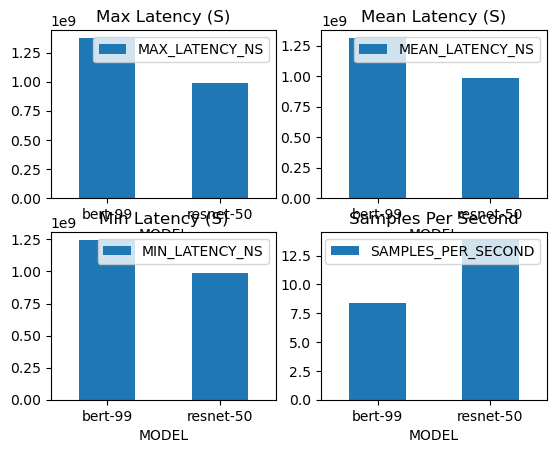

In [73]:
# Default behavior: show the average of the model across all architectures for each metric
model_gb_plot_df = plot_df[['MODEL', 'MAX_LATENCY_NS', 'MEAN_LATENCY_NS', 'MIN_LATENCY_NS', 'SAMPLES_PER_SECOND']].groupby(plot_df['MODEL']).agg({'MODEL': 'first', 'MAX_LATENCY_NS': 'mean', 'MEAN_LATENCY_NS': 'mean', 'MIN_LATENCY_NS': 'mean', 'SAMPLES_PER_SECOND': 'mean'})
num_models = model_gb_plot_df['MODEL'].size
subplot_model_metrics(model_gb_plot_df, 'MODEL', args)

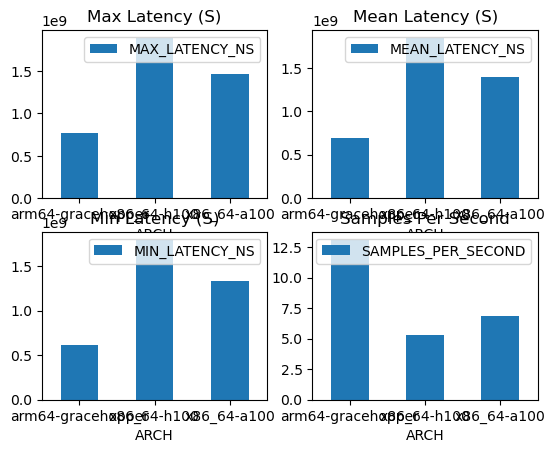

In [74]:
args.model = "bert-99"

# If the model argument is provided, plot the metrics for that specific model.
if args.model:
    subplot_model_metrics(plot_df, 'ARCH', args)